In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
data = pd.read_csv('datarumah.csv')


In [4]:
data

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


In [5]:
data['HARGA(JT)'] = data['HARGA']//1000000

In [6]:
data.head()

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS,HARGA(JT)
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0,3800
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2,4600
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4,3000
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0,430
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3,9000


<Axes: xlabel='GRS', ylabel='HARGA(JT)'>

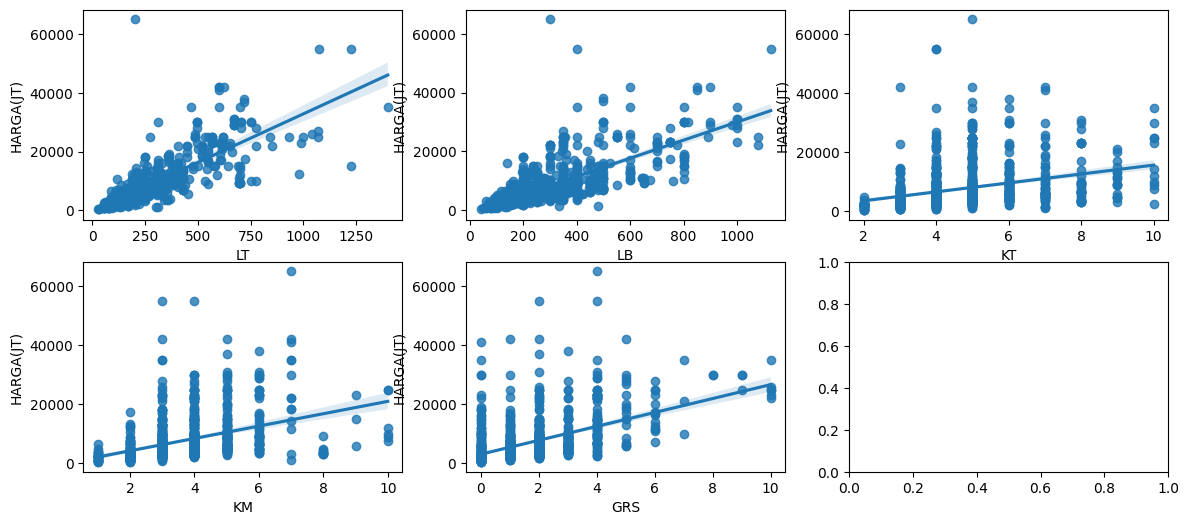

In [7]:
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(14, 6), dpi=100)
sns.regplot(data=data, x="LT", y="HARGA(JT)", ax=axs[0][0])
sns.regplot(data=data, x="LB", y="HARGA(JT)", ax=axs[0][1])
sns.regplot(data=data, x="KT", y="HARGA(JT)", ax=axs[0][2])
sns.regplot(data=data, x="KM", y="HARGA(JT)", ax=axs[1][0])
sns.regplot(data=data, x="GRS", y="HARGA(JT)", ax=axs[1][1])

In [8]:
# kita cari tahu dulu harga termurah dan termahal dari properti
data_without_no_and_price = data.drop(columns=['NO', 'NAMA RUMAH', 'HARGA'], inplace=False)
data_without_no_and_price.describe()

,LB,LT,KT,KM,GRS,HARGA(JT)
count,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000
mean,276.539604,237.432673,4.668317,3.607921,1.920792,7628.982178
std,177.864557,179.957604,1.572776,1.420066,1.510998,7340.945285
min,40.000000,25.000000,2.000000,1.000000,0.000000,430.000000
25%,150.000000,130.000000,4.000000,3.000000,1.000000,3262.500000
50%,216.500000,165.000000,4.000000,3.000000,2.000000,5000.000000
75%,350.000000,290.000000,5.000000,4.000000,2.000000,9000.000000
max,1126.000000,1400.000000,10.000000,10.000000,10.000000,65000.000000


In [9]:
#Sekarang kita akan mengelompokan harga rumah berdasarkan persebaranya
min_price = data_without_no_and_price['HARGA(JT)'].min()
max_price = data_without_no_and_price['HARGA(JT)'].max()
q = data_without_no_and_price['HARGA(JT)'].quantile([.25, .5, .75])
q

0.25    3262.5
0.50    5000.0
0.75    9000.0
Name: HARGA(JT), dtype: float64

In [11]:

low_price_house = data_without_no_and_price.loc[data_without_no_and_price['HARGA(JT)'] <= q[0.25]]
mid_price_house = data_without_no_and_price.loc[(data_without_no_and_price['HARGA(JT)'] > q[0.25]) & (data_without_no_and_price['HARGA(JT)'] <= q[0.50])]
high_price_house = data_without_no_and_price.loc[data_without_no_and_price['HARGA(JT)'] > q[0.50]]

([<matplotlib.patches.Wedge at 0x7fde731f3760>,
 [Text(0.7766068309123683, 0.7790262063501129, 'Harga Rendah'),
  Text(-0.8189838062989407, 0.7343470058630996, 'Harga Menengah'),
  Text(0.05813885738749492, -1.0984625042584188, 'Harga Tinggi')],
 [Text(0.4236037259522008, 0.42492338528187973, '25%'),
  Text(-0.44671843979942216, 0.40055291228896345, '27%'),
  Text(0.03171210402954268, -0.5991613659591375, '48%')])

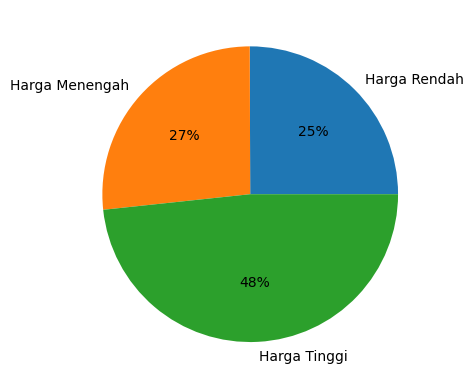

In [12]:
plt.pie([len(low_price_house), len(mid_price_house), len(high_price_house)], labels = ['Harga Rendah', 'Harga Menengah', 'Harga Tinggi'], autopct='%.0f%%')